In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [53]:
housing = fetch_california_housing()
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [54]:
type(housing)

sklearn.utils._bunch.Bunch

In [55]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [56]:
df['Price'] = housing.target    # 将目标变量加入df中
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

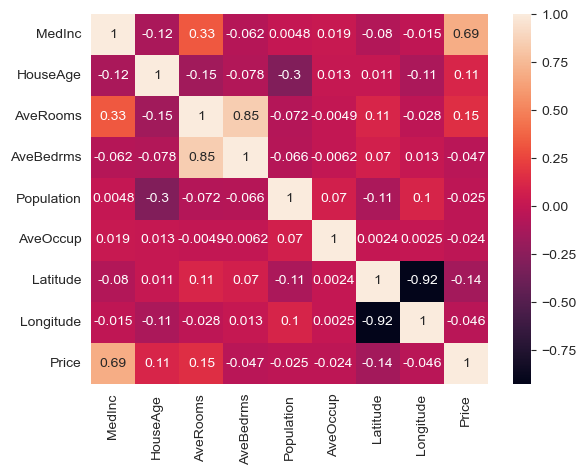

In [57]:
# 导入热力图
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [58]:
# 描述区域人口总数与价格之间的关系
X = df['Population'].values.reshape(-1,1)
y = df['Price'].values

In [59]:
# 划分训练集，测试集
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train,X_text,y_train,y_text = train_test_split(X,y,test_size=0.2)

In [60]:
# 模型训练
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred = model.predict(X_text)
print(f'MSE: {mean_squared_error(y_text,y_pred)}')
print(f"系数: {model.coef_[0]:.2f}, 截距: {model.intercept_:.2f}")

MSE: 1.3536579009743572
系数: -0.00, 截距: 2.09


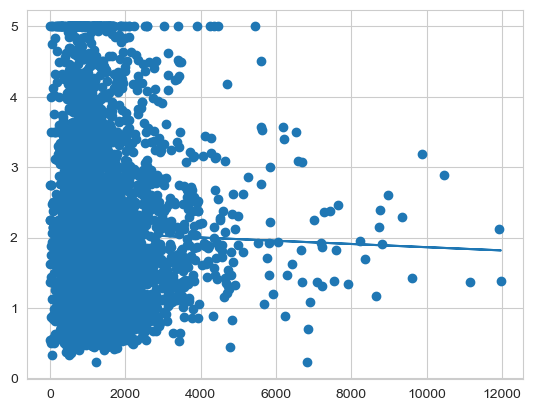

In [62]:
# 可视化
plt.scatter(X_text,y_text)
plt.plot(X_text,y_pred)
plt.show()